In [1]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import matplotlib.patches as mpatches
import seaborn as sns


In [2]:
df = pd.read_csv('StudentsPerformance.csv', low_memory=False)

In [3]:
df.isnull().values.any()

False

In [4]:
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['Total'] = df['math score'] + df['reading score'] + df['writing score']

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [8]:
df['gender_dummies'] = df.gender.map({'female':0, 'male':1})


In [9]:
df['lunch_dummies'] = df.lunch.map({'standard':0, 'free/reduced':1})

In [10]:
df['test_prep_dummies'] = df['test preparation course'].map({'none':0, 'completed':1})

In [11]:
df['POED'] = df['parental level of education'].map({'some college':0, "associate's degree":1,'high school':2,'some high school':3,"bachelor's degree":4,"master's degree":5})


In [12]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,gender_dummies,lunch_dummies,test_prep_dummies,POED
7,male,group B,some college,free/reduced,none,40,43,39,122,1,1,0,0
94,female,group B,some college,standard,none,79,86,92,257,0,0,0,0
823,female,group B,high school,free/reduced,none,71,87,82,240,0,1,0,2
366,male,group C,high school,standard,completed,69,58,53,180,1,0,1,2
794,female,group B,high school,standard,none,42,52,51,145,0,0,0,2


In [124]:
#L1 Penalty
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Total','test_prep_dummies'], axis = 1) 
y = df['test_prep_dummies']
X_train , X_test ,y_train , y_test =train_test_split(X, y, test_size=0.4, random_state=101)
log_1 = LogisticRegression(penalty='l1', solver='liblinear',dual = False, max_iter = 400000)
log_1.fit(X_train, y_train)
cross_val_score(log_1, X_train, y_train, cv = 20, scoring = 'accuracy').mean()

0.7216666666666667

In [125]:
#L2 penalty
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Total','test_prep_dummies'], axis = 1) 
y = df['test_prep_dummies']
X_train , X_test ,y_train , y_test =train_test_split(X, y, test_size=0.4, random_state=101)
log_2 = LogisticRegression(penalty='l2', solver='saga',dual = False, max_iter = 400000)
log_2.fit(X_train, y_train)
cross_val_score(log_2, X_train, y_train, cv = 20, scoring = 'accuracy').mean()

0.7066666666666666

In [126]:
#no penalty(regularization)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Total','test_prep_dummies'], axis = 1) 
y = df['test_prep_dummies']
X_train , X_test ,y_train , y_test =train_test_split(X, y, test_size=0.4, random_state=101)
log_3 = LogisticRegression(penalty='none',dual = False, max_iter = 400000)
log_3.fit(X_train, y_train)
cross_val_score(log_3, X_train, y_train, cv = 20, scoring = 'accuracy').mean()

0.7216666666666667

In [102]:
from sklearn.model_selection import train_test_split

In [134]:
X = df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Total','test_prep_dummies'], axis = 1) 
y = df['test_prep_dummies']
X_train , X_test ,y_train , y_test =train_test_split(X, y, test_size=0.4, random_state=101)

In [135]:
log = LogisticRegression(penalty='l2' ,solver = 'saga',dual = False, max_iter = 4000)

In [136]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
log.score(X_test, y_test)

0.7125

In [130]:
#Classification Report
from sklearn.metrics import classification_report, confusion_matrix
predicted = log.predict(X_test)
classification_report(y_test, predicted)
confusion_matrix(y_test, predicted)

array([[215,  43],
       [ 74,  68]])

In [26]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = log
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.778 (0.028)


In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
predicted = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predicted[:,1], pos_label=1)
random_probs=[]
for i in range(len(y_test)):
    random_probs.append(i)
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [25]:
df_mini = pd.DataFrame({'x':fpr, 'y':tpr})
x=df_mini['x']
y=df_mini['y']

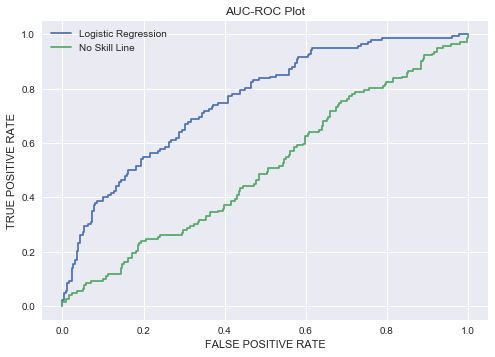

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
plt.plot(x, y)
plt.plot(p_fpr, p_tpr, marker = '_')

plt.title('AUC-ROC Plot')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.gca().legend(('Logistic Regression','No Skill Line'))

plt.show()

